<a href="https://colab.research.google.com/github/aarsh121/Recipe_site_traffic/blob/main/Recipe_Site_Web_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Focus
Daily, Tasty Bytes features selected cooking recipes on the its homepage. The company's product team analysis indicates that the most popular recipes generate additional traffic to the rest of the website — up to 40%. Consequently, the increase in web traffic leads to more subscriptions to the Tasty Bytes' services.

The positive relationship between recipe popularity, web traffic, customer engagement and services subscriptions motivated the company to apply data science and machine learning for its operational and strategic marketing.

The Tasty Bytes' product team has the following requests regarding recipe discovery:

Predict which recipes will lead to high web traffic.
Correctly predict high-traffic recipes 80% of the time

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [ ]:
print(df.servings.unique())
print(df.category.unique())

['6' '4' '1' '2' '4 as a snack' '6 as a snack']
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [ ]:
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df1=df
df1.shape

(947, 8)

In [ ]:
missing_val=df1.isnull().sum().to_frame(name='missing count')
missing_val['%missing']=round(missing_val/947*100,2)
#missing_val['%missing']=round(df1.isna().mean(),2)
missing_val

,missing count,%missing
recipe,0,0.00
calories,52,5.49
carbohydrate,52,5.49
sugar,52,5.49
protein,52,5.49
category,0,0.00
servings,0,0.00
high_traffic,373,39.39


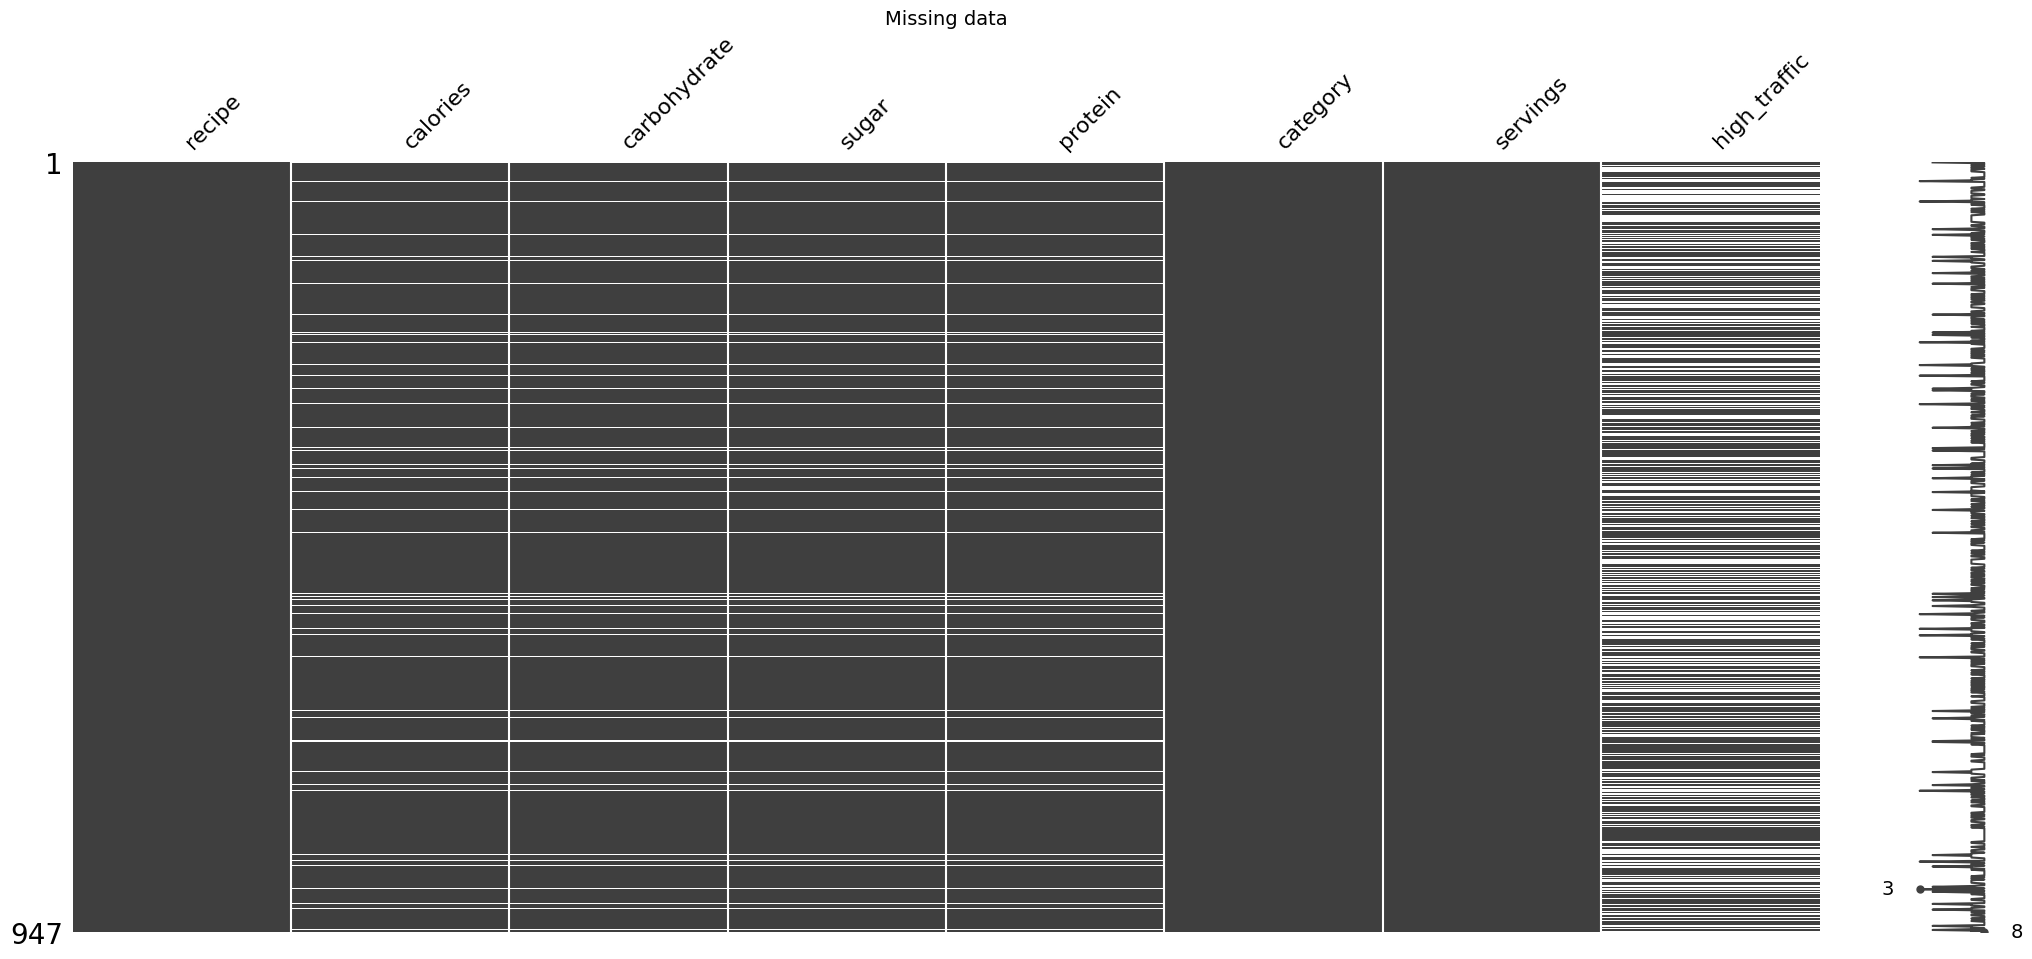

In [ ]:
import missingno as msno
msno.matrix(df1)
plt.title('Missing data', fontsize=14)
plt.show()

In [ ]:
df1.set_index('recipe', inplace=True)
df1.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [ ]:
df1['high_traffic'].fillna('Low', inplace=True)
df1['high_traffic'].value_counts()


High    574
Low     373
Name: high_traffic, dtype: int64

In [ ]:
df1['calories'].describe()

count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64

In [ ]:
cal_dict=df1.groupby('category')['calories'].median().to_dict()
cal_dict

{'Beverages': 126.455,
 'Breakfast': 229.38,
 'Chicken': 379.87,
 'Chicken Breast': 371.33500000000004,
 'Dessert': 288.55,
 'Lunch/Snacks': 369.505,
 'Meat': 460.87,
 'One Dish Meal': 419.28,
 'Pork': 399.26,
 'Potato': 269.46,
 'Vegetable': 124.30499999999999}

In [ ]:
df1['calories']=df1['calories'].fillna(df1['category'].map(cal_dict))
df1['calories'].describe()

count     947.000000
mean      431.056241
std       441.370267
min         0.140000
25%       114.410000
50%       296.920000
75%       576.225000
max      3633.160000
Name: calories, dtype: float64

In [ ]:
carb_dict=df1.groupby('category')['carbohydrate'].median().to_dict()
df1['carbohydrate'].describe()

count    895.000000
mean      35.069676
std       43.949032
min        0.030000
25%        8.375000
50%       21.480000
75%       44.965000
max      530.420000
Name: carbohydrate, dtype: float64

In [ ]:
df1['carbohydrate']=df1['carbohydrate'].fillna(df1['category'].map(carb_dict))
df1.describe()

,calories,carbohydrate,sugar,protein
count,947.000000,947.000000,895.000000,895.000000
mean,431.056241,34.454947,9.046547,24.149296
std,441.370267,42.844746,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,114.410000,9.135000,1.690000,3.195000
50%,296.920000,21.190000,4.550000,10.800000
75%,576.225000,42.590000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


In [ ]:
df1['sugar'].describe()
sugar_dict=df1.groupby('category')['sugar'].median().to_dict()

In [ ]:
df1['sugar'] = df1['sugar'].fillna(df1['category'].map(sugar_dict))
print(df1['sugar'].describe())

count    947.000000
mean       8.887598
std       14.372359
min        0.010000
25%        1.795000
50%        4.400000
75%        9.565000
max      148.750000
Name: sugar, dtype: float64


In [ ]:
pro_dict=df1.groupby('category')['protein'].median().to_dict()
df1['protein'].describe()

count    895.000000
mean      24.149296
std       36.369739
min        0.000000
25%        3.195000
50%       10.800000
75%       30.200000
max      363.360000
Name: protein, dtype: float64

In [ ]:
protein_dict = df1.groupby('category')['protein'].median().to_dict()
protein_dict

{'Beverages': 0.41000000000000003,
 'Breakfast': 11.685,
 'Chicken': 32.98,
 'Chicken Breast': 37.769999999999996,
 'Dessert': 4.81,
 'Lunch/Snacks': 12.965,
 'Meat': 28.53,
 'One Dish Meal': 28.48,
 'Pork': 29.82,
 'Potato': 5.9,
 'Vegetable': 4.835}

In [ ]:
df1['protein'] = df1['protein'].fillna(df1['category'].map(protein_dict))
print(df1['protein'].describe())

count    947.000000
mean      23.957212
std       35.479461
min        0.000000
25%        3.465000
50%       11.240000
75%       29.820000
max      363.360000
Name: protein, dtype: float64


In [ ]:
df1['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [ ]:
df1['category']=df1['category'].str.replace('Chicken Breast', 'Chicken')
df1['category']=df1['category'].astype('category')
print(df['category'].describe())

count         947
unique         10
top       Chicken
freq          172
Name: category, dtype: object


In [ ]:
df1['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [ ]:
df1['servings']=df1['servings'].str.rstrip(' as a snack')
df1['servings']=df1['servings'].astype('int')
df1['servings'].describe()

count    947.000000
mean       3.477297
std        1.732741
min        1.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        6.000000
Name: servings, dtype: float64

In [ ]:
print(df1.dtypes)
df1.describe(include='all')

calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings           int64
high_traffic      object
dtype: object


,calories,carbohydrate,sugar,protein,category,servings,high_traffic
count,947.000000,947.000000,947.000000,947.000000,947,947.000000,947
unique,NaN,NaN,NaN,NaN,10,NaN,2
top,NaN,NaN,NaN,NaN,Chicken,NaN,High
freq,NaN,NaN,NaN,NaN,172,NaN,574
mean,431.056241,34.454947,8.887598,23.957212,NaN,3.477297,NaN
std,441.370267,42.844746,14.372359,35.479461,NaN,1.732741,NaN
min,0.140000,0.030000,0.010000,0.000000,NaN,1.000000,NaN
25%,114.410000,9.135000,1.795000,3.465000,NaN,2.000000,NaN
50%,296.920000,21.190000,4.400000,11.240000,NaN,4.000000,NaN
75%,576.225000,42.590000,9.565000,29.820000,NaN,4.000000,NaN


In [ ]:
web_traffic=df1['high_traffic'].value_counts().to_frame()
web_traffic['percent']=round(df1['high_traffic'].value_counts(normalize=True)*100,2)
web_traffic

,high_traffic,percent
High,574,60.61
Low,373,39.39


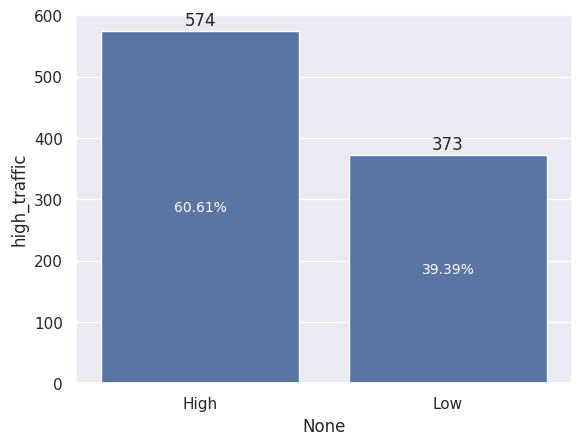

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={"figure.dpi":100})
ax=sns.barplot(data=web_traffic, x=web_traffic.index, y='high_traffic')
for i in ax.containers:
  ax.bar_label(i, padding=1.04)
ax.bar_label(ax.containers[0], labels=['60.61%', '39.39%'], label_type='center', color='white', fontsize=10)
plt.show()



In [ ]:
cat = df1['category'].value_counts().reset_index()
cat['percntg']=cat['category'].apply(lambda c: round(c/cat['category'].sum()*100),2)
#cat.rename(columns={'index': 'category'}, inplace=True)
cat.rename(columns={'category': 'count'}, inplace=True)
display(cat)

,index,count,percntg
0,Chicken,172,18
1,Breakfast,106,11
2,Beverages,92,10
3,Lunch/Snacks,89,9
4,Potato,88,9
5,Pork,84,9
6,Dessert,83,9
7,Vegetable,83,9
8,Meat,79,8
9,One Dish Meal,71,7


In [ ]:
cat.rename(columns={'index': 'category'}, inplace=True)

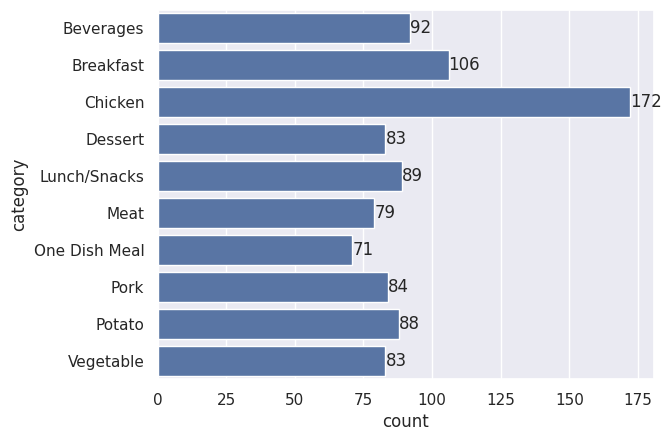

In [ ]:


ax=sns.barplot(data=cat, y='category', x='count')

ax.bar_label(ax.containers[0])

plt.show()



In [ ]:
cat_trff=df1.groupby(['category', 'high_traffic'], observed= False)['high_traffic'].agg(count='count')

trf_cat=pd.pivot_table(data=cat_trff, index='category', columns='high_traffic',values='count').sort_values('High', ascending=False)
trf_cat

high_traffic,High,Low
category,,
Potato,83,5
Vegetable,82,1
Pork,77,7
Chicken,73,99
Meat,59,20
Lunch/Snacks,57,32
Dessert,53,30
One Dish Meal,52,19
Breakfast,33,73


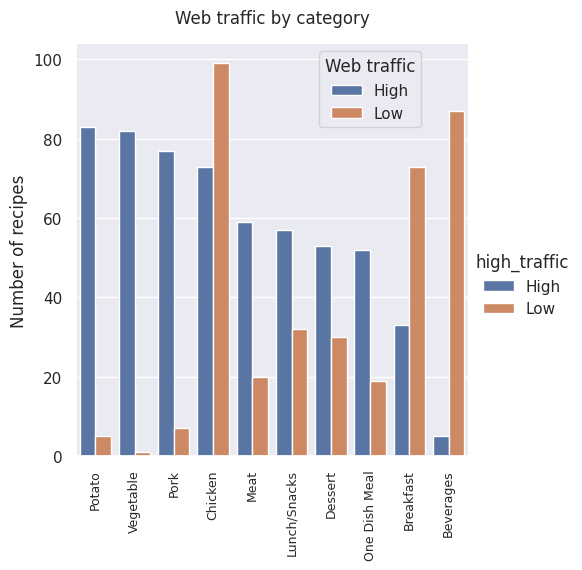

In [ ]:
sns.catplot(data=df1, x='category', hue='high_traffic', kind='count', order=trf_cat.index)
plt.xticks(rotation=90)
plt.title("Web traffic by category",
          y=1.03,
          fontsize=12)
plt.xlabel("")
plt.xticks(fontsize=9)
plt.ylabel("Number of recipes")
plt.legend(title="Web traffic",
           loc='best',
           bbox_to_anchor=(0.2, 0.5, 0.7, 0.5))
plt.show()

In [ ]:
receipe_trrf=cat[['category', 'count']].merge(trf_cat, on='category')
receipe_trrf

,category,count,High,Low
0,Chicken,172,73,99
1,Breakfast,106,33,73
2,Beverages,92,5,87
3,Lunch/Snacks,89,57,32
4,Potato,88,83,5
5,Pork,84,77,7
6,Dessert,83,53,30
7,Vegetable,83,82,1
8,Meat,79,59,20
9,One Dish Meal,71,52,19


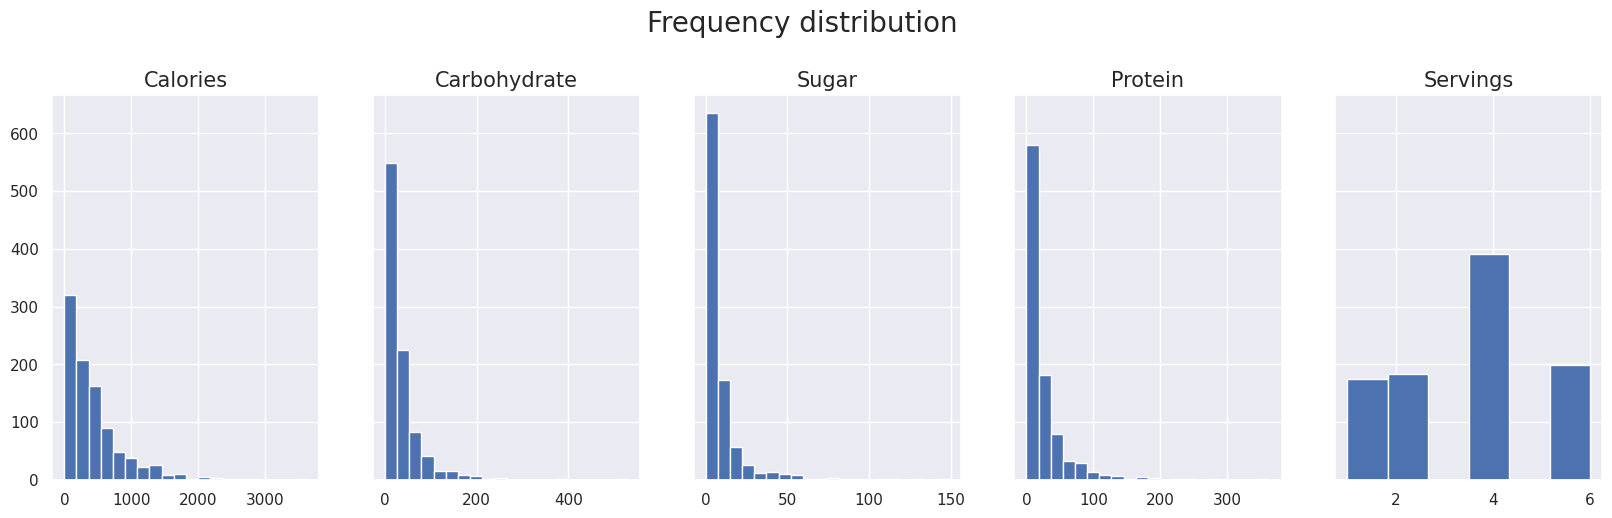

In [ ]:
# Create frequency distribution histograms for all numerical variables.
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1,
                                              ncols=5,
                                              sharey=True,
                                              figsize=(20, 5))

fig.suptitle("Frequency distribution",
             fontsize=20,
             y=1.05)

# calories column
ax1.set_title("Calories", fontsize=15)
ax1.hist(df1['calories'], bins=20)

# carbohydrate column
ax2.set_title("Carbohydrate", fontsize=15)
ax2.hist(df1['carbohydrate'], bins=20)

# sugar column
ax3.set_title("Sugar", fontsize=15)
ax3.hist(df1['sugar'], bins=20)

# protein column
ax4.set_title("Protein", fontsize=15)
ax4.hist(df1['protein'], bins=20)

# servings column
ax5.set_title("Servings", fontsize=15)
ax5.hist(df1['servings'], bins=6)
plt.show()

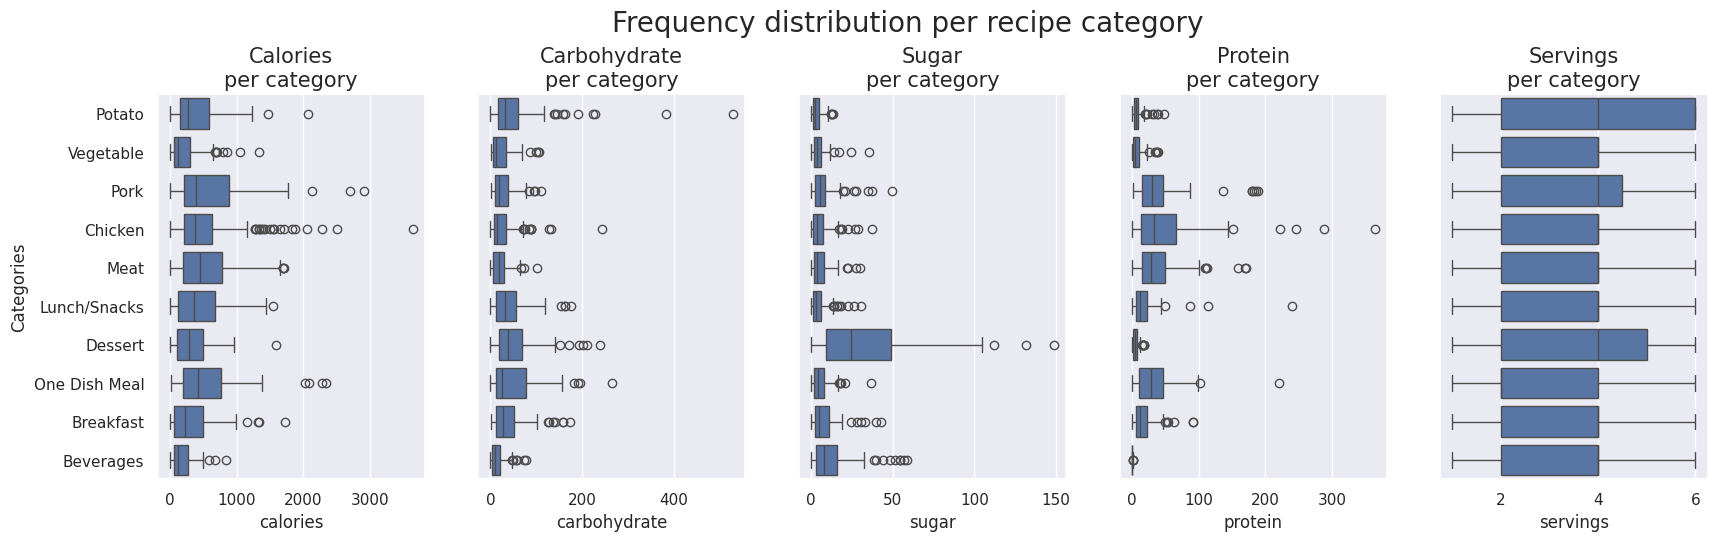

In [ ]:
# Plot the numerical variables frequency distribution by category.
fig, ax = plt.subplots(nrows=1,
                       ncols=5,
                       sharey=True,
                       figsize=(20, 5))

fig.suptitle("Frequency distribution per recipe category",
             fontsize=20,
             y=1.05)

# Plot calories frequency by recipe category.
sns.boxplot(data=df1,
            x='calories',
            y='category',
            order=trf_cat.index,
            ax=ax[0],
            )
ax[0].set_title('Calories\nper category', fontsize=15)
ax[0].set_ylabel("Categories")

# Plot carbohydrate frequency by recipe category.
sns.boxplot(data=df1,
            x='carbohydrate',
            y='category',
            order=trf_cat.index,
            ax=ax[1],
            )
ax[1].set_title('Carbohydrate\nper category', fontsize=15)
ax[1].set(ylabel='')

# Plot sugar frequency by recipe category.
sns.boxplot(data=df1,
            x='sugar',
            y='category',
            order=trf_cat.index,
            ax=ax[2],
            )
ax[2].set_title('Sugar\nper category', fontsize=15)
ax[2].set(ylabel='')

# Plot protein frequency by recipe category.
sns.boxplot(data=df1,
            x='protein',
            y='category',
            order=trf_cat.index,
            ax=ax[3],
            )
ax[3].set_title('Protein\nper category', fontsize=15)
ax[3].set(ylabel='')

# Plot servings frequency by recipe category.
sns.boxplot(data=df1,
            x='servings',
            y='category',
            order=trf_cat.index,
            ax=ax[4],
            )
ax[4].set_title('Servings\nper category', fontsize=15)
ax[4].set(ylabel='')

plt.show()

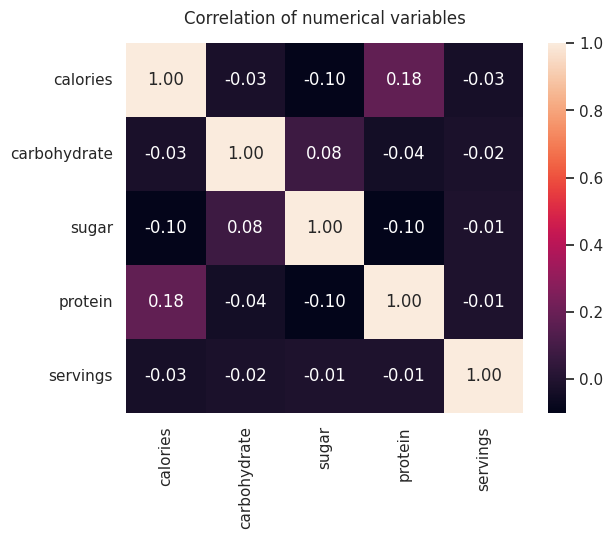

In [ ]:
sns.heatmap(df1.corr(numeric_only=True), fmt='.2f',annot=True)
plt.title("Correlation of numerical variables",
          y=1.03)
plt.show()


In [ ]:
df1['recp_pop']=df1['high_traffic'].apply(lambda c: 1 if c=='High' else 0)

display(df1[['high_traffic', 'recp_pop']].head())
df1.value_counts(subset=['high_traffic', 'recp_pop']).to_frame()

,high_traffic,recp_pop
recipe,,
1,High,1
2,High,1
3,Low,0
4,High,1
5,Low,0


,,0
high_traffic,recp_pop,
High,1,574
Low,0,373


In [ ]:
dfml=df1.drop('high_traffic', axis=1)
dfml.head()

,calories,carbohydrate,sugar,protein,category,servings,recp_pop
recipe,,,,,,,
1,399.26,19.56,5.23,29.82,Pork,6,1
2,35.48,38.56,0.66,0.92,Potato,4,1
3,914.28,42.68,3.09,2.88,Breakfast,1,0
4,97.03,30.56,38.63,0.02,Beverages,4,1
5,27.05,1.85,0.80,0.53,Beverages,4,0


In [ ]:
dfml=pd.get_dummies(dfml, drop_first=True, dtype='int')
dfml.head()


,calories,carbohydrate,sugar,protein,servings,recp_pop,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
recipe,,,,,,,,,,,,,,,
1,399.26,19.56,5.23,29.82,6,1,0,0,0,0,0,0,1,0,0
2,35.48,38.56,0.66,0.92,4,1,0,0,0,0,0,0,0,1,0
3,914.28,42.68,3.09,2.88,1,0,1,0,0,0,0,0,0,0,0
4,97.03,30.56,38.63,0.02,4,1,0,0,0,0,0,0,0,0,0
5,27.05,1.85,0.80,0.53,4,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=dfml.drop('recp_pop',axis=1).values
y=dfml['recp_pop'].values


array([[3.9926e+02, 1.9560e+01, 5.2300e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.5480e+01, 3.8560e+01, 6.6000e-01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [9.1428e+02, 4.2680e+01, 3.0900e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [9.5174e+02, 2.9420e+01, 3.5700e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.6661e+02, 3.5770e+01, 9.7000e-01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.8456e+02, 4.5210e+01, 6.2000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
X.shape, y.shape

((947, 14), (947,))

In [ ]:
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     cross_val_score,
                                     GridSearchCV)
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier,
                              RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn import metrics
from yellowbrick.model_selection import FeatureImportances

X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=15)

In [ ]:
std_scaler=StandardScaler()
X_train_scaled= std_scaler.fit_transform(X_train)
X_test_scaled=std_scaler.fit_transform(X_test)

print(np.mean(X_train), np.std(X_train))
print(np.mean(X_train_scaled), np.std(X_train_scaled))


35.31107992073976 158.9317851280451
8.037017404155691e-17 1.0000000000000002


In [ ]:
baseml=DummyClassifier(strategy='stratified', random_state=15)
baseml.fit(X_train_scaled, y_train)
y_pred_ml= baseml.predict(X_test)

baseml_acc=round(baseml.score(X_test_scaled, y_test)*100,2)
print(baseml_acc)

baseml_precision= round(metrics.precision_score(y_test, y_pred_ml)*100,2)
print(baseml_precision)


52.63
60.33
